In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics

## Preprocessing Data

### Import data

In [52]:
df = pd.read_csv('../Data/PGH/DemandPrediction/learning_set_unnormalized.csv')
df.head(4)

,Unnamed: 0,index,walk_score,bike_score,transit_score,temp,month,year,outflow
0,0,38,76,82,86,73.0,JUL,2018,1
1,1,39,76,82,86,69.7,AUG,2018,0
2,2,40,76,82,86,53.4,SEP,2018,0
3,3,41,76,82,86,37.3,OCT,2018,0


In [53]:
df = df.drop(columns=['Unnamed: 0', 'index', 'year'])
y = df.iloc[:,5].to_numpy()
print(y)
df = pd.get_dummies(df,columns=['month'],drop_first=True)
df = df.drop(columns=['outflow'])
df.head()

[1 0 0 ... 6 3 0]


,walk_score,bike_score,transit_score,temp,month_AUG,month_DEC,month_FEB,month_JAN,month_JUL,month_JUN,month_MAR,month_MAY,month_NOV,month_OCT,month_SEP
0,76,82,86,73.0,0,0,0,0,1,0,0,0,0,0,0
1,76,82,86,69.7,1,0,0,0,0,0,0,0,0,0,0
2,76,82,86,53.4,0,0,0,0,0,0,0,0,0,0,1
3,76,82,86,37.3,0,0,0,0,0,0,0,0,0,1,0
4,76,82,86,34.9,0,0,0,0,0,0,0,0,1,0,0


In [55]:
#try to filter out outflow that is only greater than 0
# df_filter = df[df['outflow']>0]
# len(df_filter)

In [ ]:
# len(df)

In [ ]:
# plt.scatter(df_filter['bike_score'], df_filter['outflow'], s=1); plt.show()

### Split data for training and test

We have a small number of locations that have bike stations. First, we need to filter out any cell that does not have any stations.

In [56]:
X = df.iloc[:, :].to_numpy() #only use this line if using the first and second code cell

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Perform Feature Scaling

## Defining Models
Code from https://towardsdatascience.com/end-to-end-case-study-bike-sharing-demand-dataset-53201926c8db

In [57]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree

RMLSE for the data: 0.967499242676143


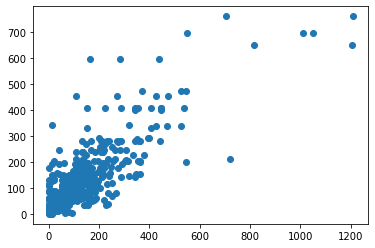

In [59]:
plt.scatter(y_test, y_pred)
plt.show()

In [60]:
#Random Forest
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_

In [61]:
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For random forest

RMLSE for the data: 0.9136267247059643


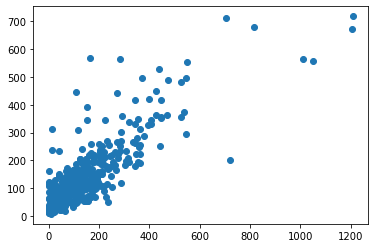

In [62]:
plt.scatter(y_test, y_pred)
plt.show()

In [63]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}

gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(X_train,y_train)
c = gs_ar.best_params_

In [64]:
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMSLE for the data:',rmsle) # For Ada-Boost

RMSLE for the data: 0.9723812764755068


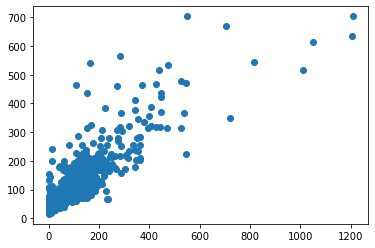

In [65]:
plt.scatter(y_test, y_pred)
plt.show()

----

In [77]:
df = pd.read_csv('../Data/PGH/DemandPrediction/learning_set_unnormalized.csv')
df = df.drop(columns=['Unnamed: 0', 'index', 'year', 'month'])
df.head()

,walk_score,bike_score,transit_score,temp,outflow
0,76,82,86,73.0,1
1,76,82,86,69.7,0
2,76,82,86,53.4,0
3,76,82,86,37.3,0
4,76,82,86,34.9,0


In [78]:
X = df.iloc[:, :4].to_numpy()
y = df.iloc[:,4].to_numpy() #add this line only if you did not define y in the second code cell make sure to change the values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
y = df.iloc[:,4].to_numpy()
y

array([1, 0, 0, ..., 6, 3, 0])

In [80]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_

dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree

RMLSE for the data: 0.9259338465657602


In [81]:
np.mean(y_test)

121.76271186440678

In [82]:
#Random Forest
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_

RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
y_pred = model.predict(X_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For random forest

RMLSE for the data: 0.9131260289911332


In [83]:
np.mean(y_test)

121.76271186440678

In [84]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}

gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(X_train,y_train)
c = gs_ar.best_params_

ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMSLE for the data:',rmsle) # For Ada-Boost

RMSLE for the data: 1.023791335332397


In [85]:
np.mean(y_test)

121.76271186440678

|  | RMSLE|
|:--:|:--:|
|Decision Tree| 0.967|
|Random Forest| 0.914|
|AdaBoost| 0.972|

when taking our month and year but leaving outflow == 0, the models get the following RMSLE:

|  | RMSLE|
|:--:|:--:|
|Decision Tree| 0.268|
|Random Forest| 0.265|
|AdaBoost| 0.265|

Trying a different verison of Df

In [86]:
df = pd.read_csv('../Data/PGH/DemandPrediction/learning_set_unnormalized.csv')
df = df.drop(columns=['Unnamed: 0', 'index', 'month', 'year'])

df_filter = df[df['outflow']>0]

X = df_filter.iloc[:, :4].to_numpy()
y = df_filter.iloc[:,4].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Random Forest
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_

RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
y_pred = model.predict(X_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle)

RMLSE for the data: 0.7884859620609537


import plotly.express as px

fig = px.scatter(df, y_test, y_pred, labels={'x':'ground truth', 
                          'y': 'predicted demand'},title="Random Forest")
fig.show()

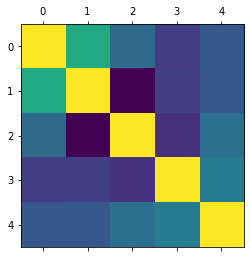

In [28]:
plt.matshow(df.corr())
plt.show()

___

Using data set with spatial attributes - i.e. number of stations and station capacity

In [30]:
df = pd.read_csv('../Data/PGH/DemandPrediction/learning_set_spatial.csv')
df = df.drop(columns=['Unnamed: 0', 'index', 'year', 'month'])
df.head(4)

,stations,capacity,walk_score,bike_score,transit_score,temp,outflow
0,1,10,76,82,86,73.0,1
1,1,10,76,82,86,69.7,0
2,1,10,76,82,86,53.4,0
3,1,10,76,82,86,37.3,0


In [46]:
X = df.iloc[:, :6].to_numpy()
y = df.iloc[:,6].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
y = df.iloc[:,6].to_numpy()
y

array([1, 0, 0, ..., 6, 3, 0])

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_

dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree

RMLSE for the data: 0.8150899831554358


In [48]:
np.mean(y_test)

121.76271186440678

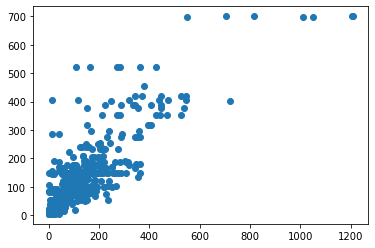

In [49]:
plt.scatter(y_test, y_pred)
plt.show()

In [50]:
#Random Forest
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_

RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
y_pred = model.predict(X_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For random forest

RMLSE for the data: 0.8043421418992356


In [51]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}

gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(X_train,y_train)
c = gs_ar.best_params_

ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMSLE for the data:',rmsle) # For Ada-Boost

RMSLE for the data: 0.9498907600309728


---

Getting rid of capacity and just leaving stations

In [69]:
df = pd.read_csv('../Data/PGH/DemandPrediction/learning_set_spatial.csv')
df = df.drop(columns=['Unnamed: 0', 'capacity','index', 'year', 'month'])
df.head(4)

,stations,walk_score,bike_score,transit_score,temp,outflow
0,1,76,82,86,73.0,1
1,1,76,82,86,69.7,0
2,1,76,82,86,53.4,0
3,1,76,82,86,37.3,0


In [73]:
X = df.iloc[:, :5].to_numpy()
y = df.iloc[:,5].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_

dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree
print(np.mean(y_test))

RMLSE for the data: 0.9035244129283913
121.76271186440678


In [75]:
#Random Forest
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_

RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
y_pred = model.predict(X_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For random forest
print(np.mean(y_test))

RMLSE for the data: 0.8910642894916045
121.76271186440678


In [76]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}

gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(X_train,y_train)
c = gs_ar.best_params_

ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMSLE for the data:',rmsle) # For Ada-Boost
print(np.mean(y_test))

RMSLE for the data: 1.0124966738506869
121.76271186440678


----

### Spataially sensitive training set

In [103]:
df = pd.read_csv('../Data/PGH/DemandPrediction/spatially_sensitive_train.csv')
df = df.drop(columns=['Unnamed: 0', 'capacity','index', 'year', 'month', 'stationList', 'cell_num', 'nearby'])

#labels
y = df['outflow'].values
df = df.drop(columns=['outflow'])
X = df.iloc[:, :].to_numpy()

df.head(5)

,stations,walk_score,bike_score,transit_score,temp,N,S,E,W,NW,NE,SW,SE,nearby_routes
0,1,76,82,86,73.0,0,0,0,0,0,0,0,0,63
1,1,76,82,86,69.7,0,0,0,0,0,0,0,0,63
2,1,76,82,86,53.4,3,0,0,0,0,3,0,0,63
3,1,76,82,86,37.3,3,0,0,0,0,3,0,0,63
4,1,76,82,86,34.9,3,0,0,0,0,3,0,0,63


In [104]:
y

array([1, 0, 0, ..., 6, 3, 0])

In [105]:
X

array([[ 1., 76., 82., ...,  0.,  0., 63.],
       [ 1., 76., 82., ...,  0.,  0., 63.],
       [ 1., 76., 82., ...,  0.,  0., 63.],
       ...,
       [ 1., 60., 74., ...,  0.,  0., 26.],
       [ 1., 60., 74., ...,  0.,  0., 26.],
       [ 1., 60., 74., ...,  0.,  0., 26.]])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_

dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree
print(np.mean(y_pred))

RMLSE for the data: 0.8832232814410339
124.61115830863774


In [111]:
#Random Forest
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_

RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
y_pred = model.predict(X_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For random forest
print(np.mean(y_pred))

RMLSE for the data: 0.878890196310382
122.39902834270788


In [112]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}

gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(X_train,y_train)
c = gs_ar.best_params_

ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMSLE for the data:',rmsle) # For Ada-Boost
print(np.mean(y_pred))

RMSLE for the data: 0.9952237597397655
132.9048977833412


----

Taking the stations attribute out...I don't think we want that. 

In [113]:
df = pd.read_csv('../Data/PGH/DemandPrediction/spatially_sensitive_train.csv')
df = df.drop(columns=['Unnamed: 0', 'stations','capacity','index', 'year', 'month', 'stationList', 'cell_num', 'nearby'])

#labels
y = df['outflow'].values
df = df.drop(columns=['outflow'])
X = df.iloc[:, :].to_numpy()

df.head(5)

,walk_score,bike_score,transit_score,temp,N,S,E,W,NW,NE,SW,SE,nearby_routes
0,76,82,86,73.0,0,0,0,0,0,0,0,0,63
1,76,82,86,69.7,0,0,0,0,0,0,0,0,63
2,76,82,86,53.4,3,0,0,0,0,3,0,0,63
3,76,82,86,37.3,3,0,0,0,0,3,0,0,63
4,76,82,86,34.9,3,0,0,0,0,3,0,0,63


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(X_train,y_train)
a = gs_dt.best_params_

dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree
print(np.mean(y_pred))

RMLSE for the data: 0.9083834054328395
125.8113107017986


In [120]:
#Random Forest
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

gs_rf = GridSearchCV(rf,rf_params,cv=3)
gs_rf.fit(X_train,y_train)
b = gs_rf.best_params_

RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(X_train,y_train)
y_pred = model.predict(X_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For random forest
print(np.mean(y_pred))

RMLSE for the data: 0.9048022253814225
123.38639137662969


In [117]:
#Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}

gs_ar = GridSearchCV(ar,ar_params,cv=3)
gs_ar.fit(X_train,y_train)
c = gs_ar.best_params_

ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(X_train,y_train)
y_pred = model.predict(X_test)

msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMSLE for the data:',rmsle) # For Ada-Boost
print(np.mean(y_pred))

RMSLE for the data: 1.0138594822924447
133.18009645234318


In [118]:
y_pred

array([ 49.56658749, 205.04675252, 430.94668404,  69.37839387,
       136.19967338,  57.62481628, 151.35960125, 165.6191248 ,
        91.56472886, 185.69747518,  93.6880259 ,  63.25524751,
        90.89539081,  69.10734001, 389.77290219, 116.67006685,
       107.00651821,  70.05450977, 140.1980895 ,  41.02051663,
        51.86341742, 107.64752594,  84.98936603, 131.12521146,
       131.56720728,  27.83250678,  65.96940062,  31.56991112,
        32.9280684 , 103.23616701,  56.5030225 ,  42.18231811,
        79.41619067,  96.08138821, 100.93106475, 111.1918262 ,
       278.25045593,  41.20213505,  58.12672255, 111.48572902,
       219.86239139,  80.86007454,  72.77874998,  39.95822989,
        61.31978425, 205.8750364 ,  62.59098102, 127.66562669,
        36.20241436,  84.60693311,  50.41063965,  92.20052823,
       170.83412934,  61.36311478,  82.18719856, 128.6186436 ,
        66.87877374,  94.75775521,  89.24199063,  71.30597839,
       113.41966976, 108.80219238,  38.41189472, 112.33

In [119]:
y_test

array([   4,  161,  545,   16,   90,   10,  158,  236,   25,  181,   17,
         40,   63,   13,  320,   64,   35,   64,   97,    5,   40,  144,
         91,   56,   86,    1,   57,   28,   16,   68,   10,    9,   57,
         30,   66,   83,  241,   31,   25,   56,  111,   29,  114,   45,
         57,  342,   24,  101,   26,   10,   28,  213,  265,   17,  110,
         70,   38,   28,   49,   77,  133,   50,   10,   38,   19,  155,
         65,  136,  135,  112,  381,  188,  211,   58,   33,   59,   98,
        113,    3,    1,   99,   94,  131,  184,   34,  357,  155,   56,
        113,   59,  337,   59,   11,  183,  201,   26,  219,  218,   13,
        443,   46,  525,    1,  122,  216,   98,  207,   51,   90,   63,
         83,   11,   83,  104,   14,  357,   75,  138,   43,  131,  138,
        228,  288,  102,   58,  124,  192,   14,  132,  286,   52,  197,
         65,  233,  109,  343,   40,  148,   95,   35,   53,   12,  168,
        103,   67,  426,   65,   74,  151,   46,   

In [122]:
def get_model_performance(X_test, y_true, y_pred, probs):
    accuracy = accuracy_score(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)

    return accuracy, matrix, f1, fpr, tpr, roc_auc

def plot_model_performance(model, X_test, y_true):
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)
    accuracy, matrix, f1, fpr, tpr, roc_auc = get_model_performance(X_test, y_true, y_pred, probs)

    display(Markdown('#### Accuracy of the model :'))
    print(accuracy)
    display(Markdown('#### F1 score of the model :'))
    print(f1)

    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(1, 2, 1)
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')

    ax = fig.add_subplot(1, 2, 2)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic curve')
    plt.legend(loc="lower right")

In [123]:
plot_model_performance(RF, X_test.features, y_test)

AttributeError: 'numpy.ndarray' object has no attribute 'features'